### Feature Selection - Information Gain - Mutual Information in Classification Problem Statements

##### Mutual Information

MI Estimate mutual information for a discrete target variable

   Mutual Information(MI) between two random variables is a non-negative value,which measures the dependency between the variables.
    It is equal to zero if and only if two random variables independent, and higher values means higher dependency.
    
   The function relies on nonparametric methods based on entropy estimation from k-nearest neighbours distances.
   
   In Short,
   
   A quantity called mutual information measures the amount of information one can obtained from one random variable given another.
   
   The Mutual Information between two random variables X and Y can be stated formally as follows:
   
###### |(X;Y) = H(X) - H(X|Y) Where |(X;Y) is the mutual information for X and Y, H(X) is the entropy for X and H(X|Y) is the conditional entropy for X given Y.The result has the units of bits.It means range(0 to 1)
   

#### Requirements:

- Know about Entropy
- Know about Information Gain
- Know about Gini Impurity
- Know about Statistical test

These concepts are available in ML and Inferential Statistics

In [1]:
# See the usage of Information Gain - Mutual Information in Classification Problem Statements

import pandas as pd

df = pd.read_csv('https://gist.githubusercontent.com/tijptjik/9408623/raw/b237fa5848349a14a14e5d4107dc7897c21951f5/wine.csv')
df.head()

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [17]:
# Assume the feature Wine is the dependent variable
# So check the category of wine

df['Wine'].unique()

array([1, 2, 3], dtype=int64)

In [18]:
df.info() # There is no null values are present

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Wine                  178 non-null    int64  
 1   Alcohol               178 non-null    float64
 2   Malic.acid            178 non-null    float64
 3   Ash                   178 non-null    float64
 4   Acl                   178 non-null    float64
 5   Mg                    178 non-null    int64  
 6   Phenols               178 non-null    float64
 7   Flavanoids            178 non-null    float64
 8   Nonflavanoid.phenols  178 non-null    float64
 9   Proanth               178 non-null    float64
 10  Color.int             178 non-null    float64
 11  Hue                   178 non-null    float64
 12  OD                    178 non-null    float64
 13  Proline               178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [19]:
# Independent and dependent variable
X = df.drop('Wine',axis = 1)
y = df['Wine']

# Perform train_test_split to avoid overfitting

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=43)

In [20]:
X_train.head()

,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
97,12.29,1.41,1.98,16.0,85,2.55,2.50,0.29,1.77,2.90,1.23,2.74,428
53,13.77,1.90,2.68,17.1,115,3.00,2.79,0.39,1.68,6.30,1.13,2.93,1375
20,14.06,1.63,2.28,16.0,126,3.00,3.17,0.24,2.10,5.65,1.09,3.71,780
30,13.73,1.50,2.70,22.5,101,3.00,3.25,0.29,2.38,5.70,1.19,2.71,1285
160,12.36,3.83,2.38,21.0,88,2.30,0.92,0.50,1.04,7.65,0.56,1.58,520


In [21]:
y_train.head()

97     2
53     1
20     1
30     1
160    3
Name: Wine, dtype: int64

In [22]:
# Then perform the Mutual Information
# Remember if the features are highly related to the dependent feature that feature we have to select
# So passing the dependent and Independent features in mutual_info_classif

from sklearn.feature_selection import mutual_info_classif

# Perform mutual classifier
mutual_info = mutual_info_classif(X_train,y_train)
mutual_info

array([0.51173111, 0.28801434, 0.09668042, 0.22612399, 0.16288791,
       0.38052686, 0.67808665, 0.10050482, 0.28040725, 0.52124749,
       0.470189  , 0.44252383, 0.47967635])

The above are the each feature mutual information respect to dependent variable

In [23]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info

Alcohol                 0.511731
Malic.acid              0.288014
Ash                     0.096680
Acl                     0.226124
Mg                      0.162888
Phenols                 0.380527
Flavanoids              0.678087
Nonflavanoid.phenols    0.100505
Proanth                 0.280407
Color.int               0.521247
Hue                     0.470189
OD                      0.442524
Proline                 0.479676
dtype: float64

In [26]:
# Lets arrange it 

mutual_info.sort_values(ascending = False)  # To get big value correlated to small

Flavanoids              0.678087
Color.int               0.521247
Alcohol                 0.511731
Proline                 0.479676
Hue                     0.470189
OD                      0.442524
Phenols                 0.380527
Malic.acid              0.288014
Proanth                 0.280407
Acl                     0.226124
Mg                      0.162888
Nonflavanoid.phenols    0.100505
Ash                     0.096680
dtype: float64

<Axes: >

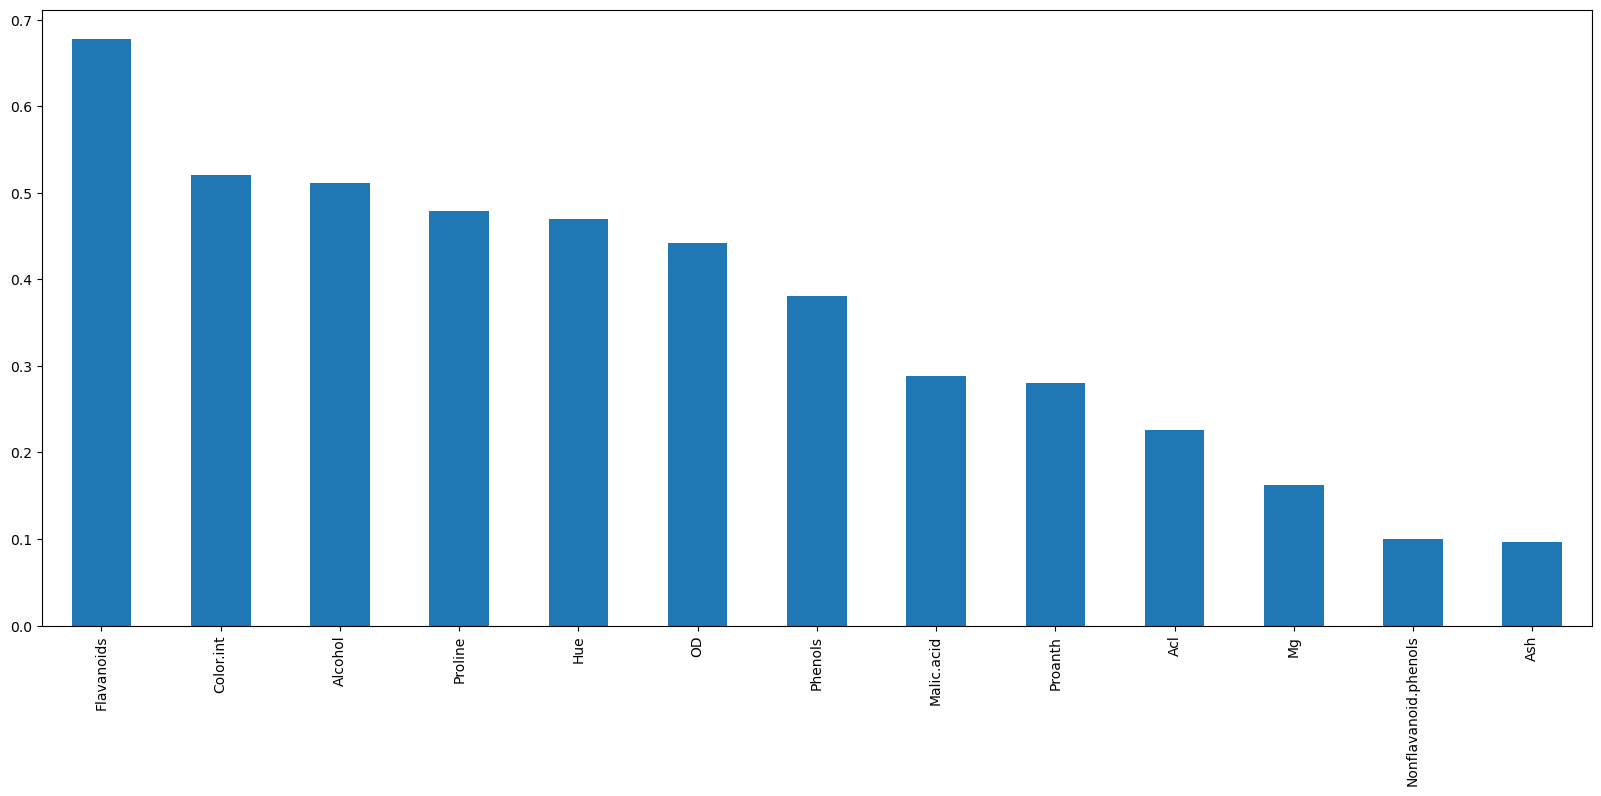

In [36]:
# Lets Visualize mutual_info

mutual_info.sort_values(ascending = False).plot.bar(figsize=(20,8))  # We are using pandas basic plot bar

Now We are select the top 5 high mutual information features,The top features selections are vary based on the dataset size.

In [38]:
# Sklearn inbuilds have one library for selection
# In this dataset we have to select top 5 features

from sklearn.feature_selection import SelectKBest
sel_five_cols = SelectKBest(mutual_info_classif,k=5)
sel_five_cols.fit(X_train,y_train)
X_train.columns[sel_five_cols.get_support()] # get_support() is used to get column index name

Index(['Alcohol', 'Flavanoids', 'Color.int', 'Hue', 'Proline'], dtype='object')

So select these top 5 feature and drop remaining the feature

### Difference Between Information Gain and Mutual Information

|(X;y) = H(X) - H(X|Y) This is the formula for Mutual Information

IG(S,a) = H(S) - H(S|a) This is the formula for Information Gain

As such,mutual information is sometimes used as a synonym for information gain.Technically,they calculate the same quantity if applied to the same data.

##### Simply,

Mutual Information is used in Classification Problem Statements.

Information Gain is used in Decision tree and random forest to select the feature of the node.

### Comparison of Univariate and Mutual Information

See the comparison of F-test and mutual information,
https://scikit-learn.org/stable/auto_examples/feature_selection/plot_f_test_vs_mi.html
